<a href="https://colab.research.google.com/github/habibaarthi/stock_predict/blob/main/final_reliance_stockpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance scikit-learn matplotlib pandas


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-72cc899b13ea>:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color = 'green' if float(price_i) >= baseline else 'red'


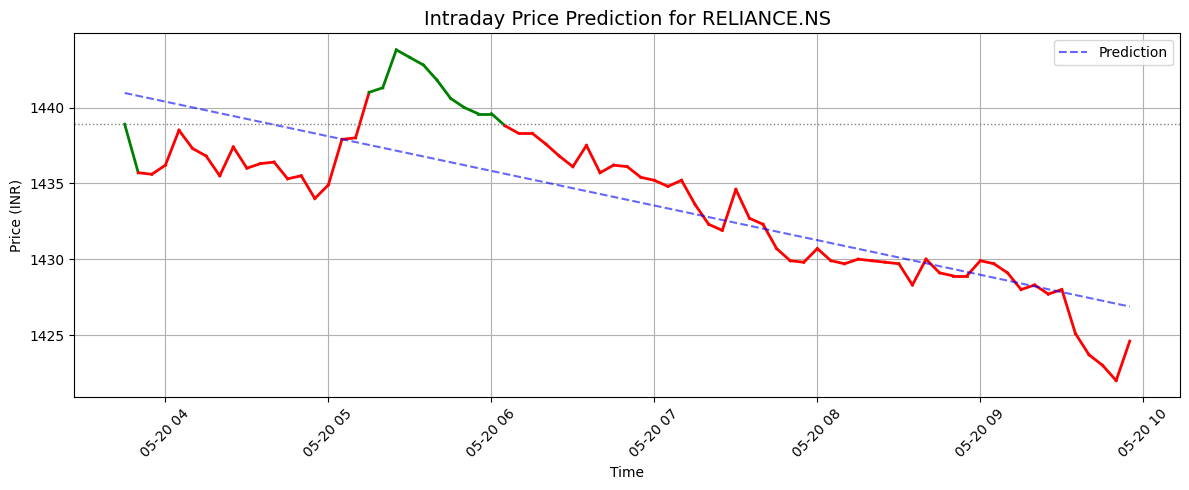

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np

# ---------- 1. Download Intraday Data ----------
symbol = "RELIANCE.NS"  # Change to your desired NSE symbol
interval = "5m"
period = "1d"

data = yf.download(tickers=symbol, interval=interval, period=period)
if data.empty:
    raise ValueError("No intraday data available. Try during market hours.")

data.reset_index(inplace=True)
data.rename(columns={"Datetime": "Time", "Close": "Price"}, inplace=True)

df = data[["Time", "Price"]].copy()
df["Time"] = pd.to_datetime(df["Time"])
df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# ---------- 2. Model Training ----------
X = df[["Minutes"]]
y = df[["Price"]]

model = LinearRegression()
model.fit(X, y.values.ravel())

df["Predicted"] = model.predict(X)

# ---------- 3. Plotting ----------
baseline = float(df["Price"].iloc[0].item())  # Fix the warning

fig, ax = plt.subplots(figsize=(12, 5))
for i in range(len(df) - 1):
    price_i = df['Price'].iloc[i]
    price_i1 = df['Price'].iloc[i + 1]
    color = 'green' if float(price_i) >= baseline else 'red'
    x = [df['Time'].iloc[i], df['Time'].iloc[i + 1]]
    y = [price_i, price_i1]
    ax.plot(x, y, color=color, linewidth=2)

# Add prediction line
ax.plot(df["Time"], df["Predicted"], linestyle='--', label="Prediction", color="blue", alpha=0.6)

# Styling
ax.set_title(f"Intraday Price Prediction for {symbol}", fontsize=14)
ax.set_xlabel("Time")
ax.set_ylabel("Price (INR)")
ax.axhline(baseline, color='gray', linestyle=':', linewidth=1)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
